In [7]:
 #Import paket yang perlu
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# UGunakan latar putih dan grid pada menu seaborn
sns.set(font_scale=1.5, style="whitegrid")
# Download data
CovIndo= pd.read_csv('DATATOTALINDO.csv')
## Jika directory beda
#os.chdir(os.path.join(et.io.HOME, 'Tempatdirku'))

# Mendefinisikan relatif path
file_path = os.path.join( "DATATOTALINDO.csv")

In [9]:
# Import data using menggunakan waktu 
CovIndo = pd.read_csv(file_path,
                                     parse_dates=['Date'],
                                     index_col= ['Date'],
                                     na_values=['999.99'])

In [10]:
CovIndo.head()

,confirmed,recovered,death
Date,,,
2020-03-02,2,0,0
2020-03-03,2,0,0
2020-03-03,2,0,0
2020-03-04,2,0,0
2020-03-05,2,0,0


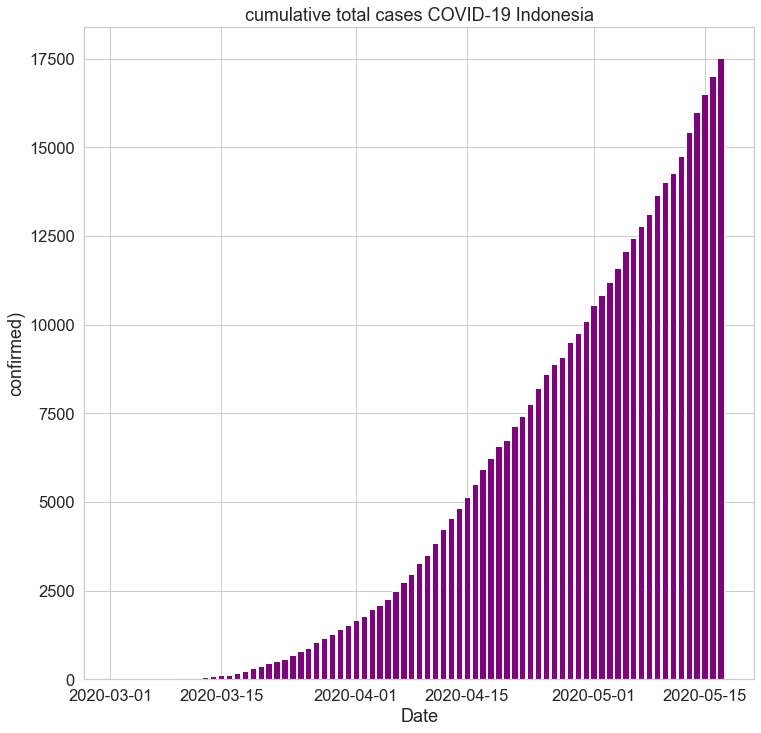

In [14]:
# Gambar 
fig, ax = plt.subplots(figsize=(12, 12))

# Definisikan sumbu x dan sumbu y
ax.bar(CovIndo.index.values,
       CovIndo['confirmed'],
       color='purple')

# Beri judul dan label pada sumbu-sumbu
ax.set(xlabel="Date",
       ylabel="confirmed)",
       title="total kumulatif kasus COVID-19 Indonesia")

plt.show()

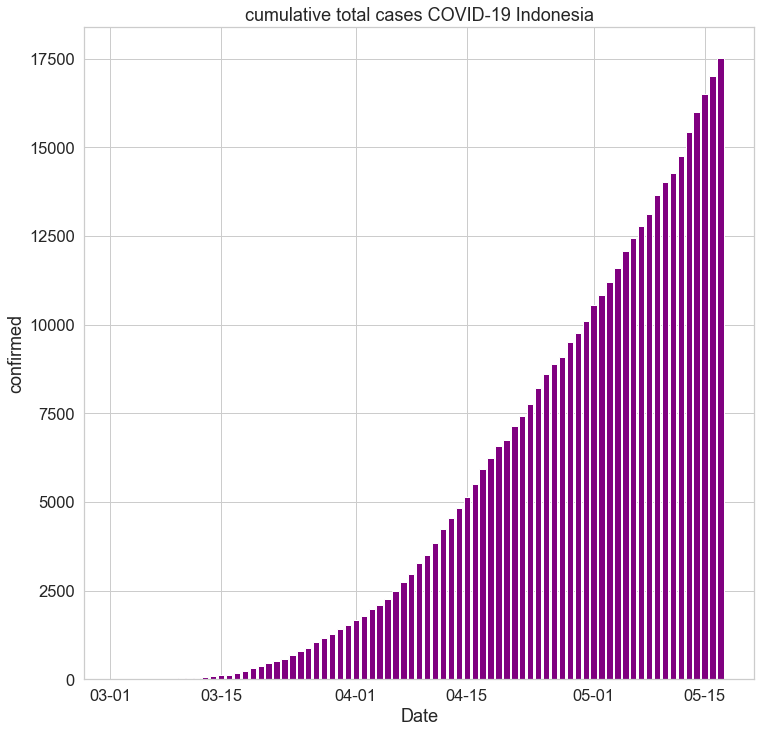

In [19]:
#memformat tanggal 
# Gambar dan tetapkan ukuran ruang gambar
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(CovIndo.index.values,
       CovIndo['confirmed'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="confirmed",
       title="cumulative total cases COVID-19 Indonesia")

# Define the date format
date_form = DateFormatter("%m-%d")  #format bulan dan hari
ax.xaxis.set_major_formatter(date_form)

plt.show()

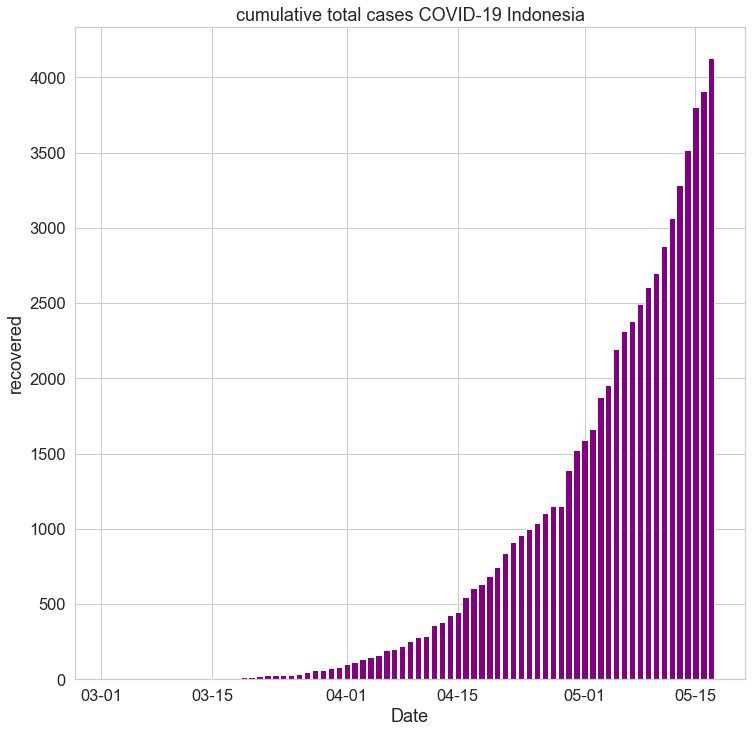

In [18]:
#memformat tanggal 
# Gambar dan tetapkan ukuran ruang gambar
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(CovIndo.index.values,
       CovIndo['recovered'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="recovered",
       title="cumulative total cases COVID-19 Indonesia")

# Define the date format
date_form = DateFormatter("%m-%d")  #format bulan dan hari
ax.xaxis.set_major_formatter(date_form)

plt.show()

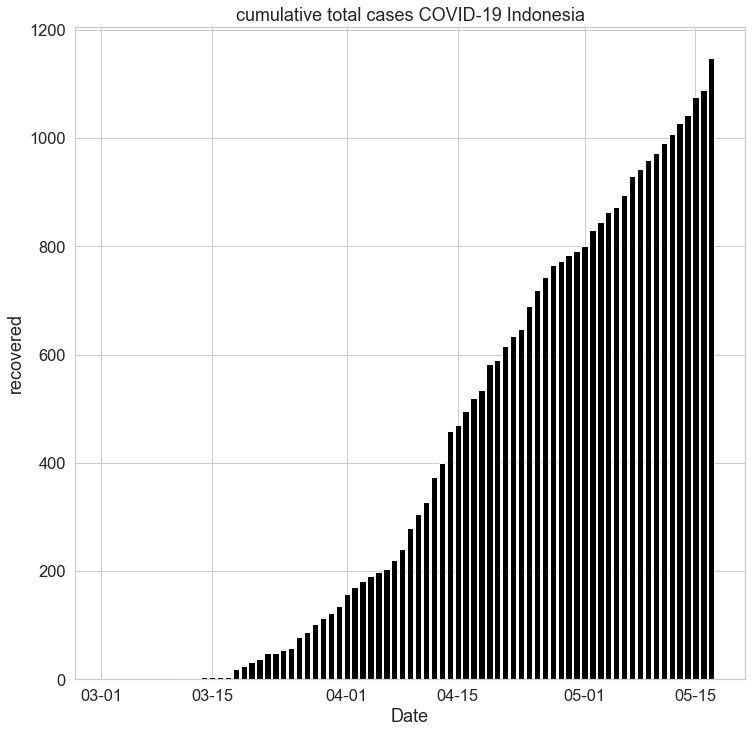

In [20]:
#memformat tanggal 
# Gambar dan tetapkan ukuran ruang gambar
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(CovIndo.index.values,
       CovIndo['death'],
       color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="recovered",
       title="cumulative total cases COVID-19 Indonesia")

# Define the date format
date_form = DateFormatter("%m-%d")  #format bulan dan hari
ax.xaxis.set_major_formatter(date_form)

plt.show()

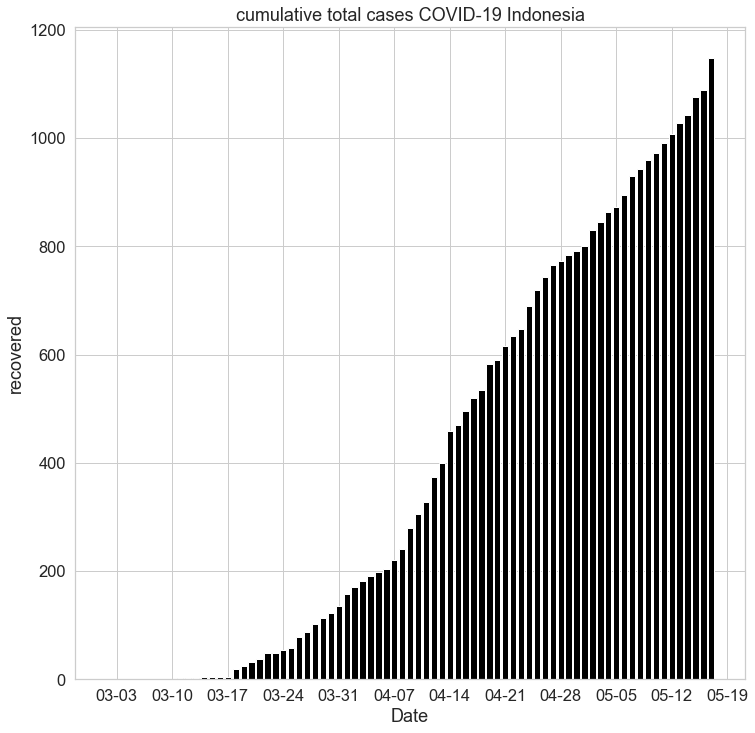

In [22]:
#Memodifikasi frekuensi menggunakan tick untuk mengindikasi setiap minggu  xaxis.set_major_locator()
#GAMBAR TIAP MINGGU
# Gambar dan tetapkan ukuran ruang gambar
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(CovIndo.index.values,
       CovIndo['death'],
       color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="recovered",
       title="cumulative total cases COVID-19 Indonesia")

# Mendefinisikan format tanggal 
date_form = DateFormatter("%m-%d")  #format bulan dan hari
ax.xaxis.set_major_formatter(date_form)

# Mendefinisikan interval data per-minggu
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

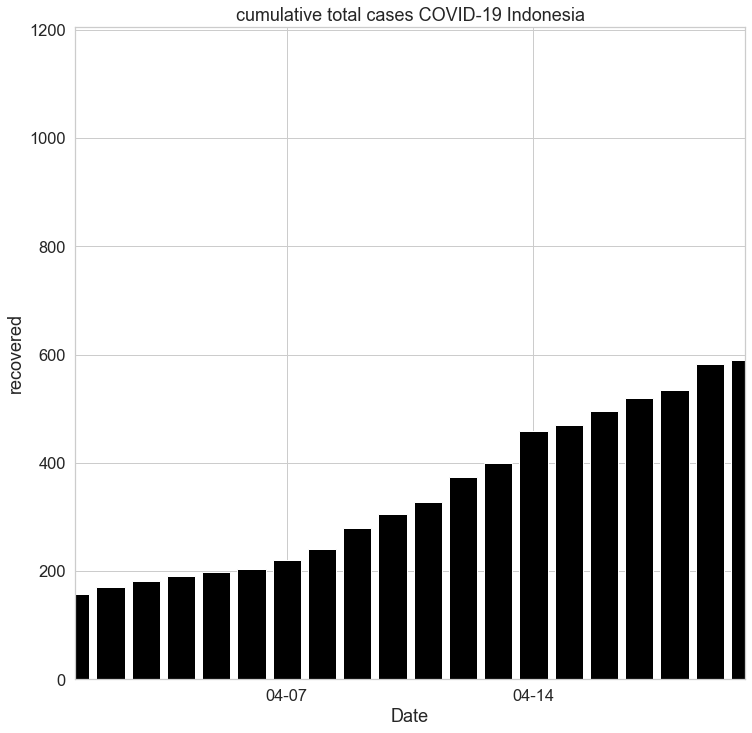

In [23]:

#mengatur data yang ditampilkan sesuai waktu awal dan akhir yangdidefinisikan dennga ax.set dan xlim
#xlim=["2020-04-01", "2020-04-20"] misalkan 
# Gambar
ffig, ax = plt.subplots(figsize=(12, 12))

# Sumbu-x dan sumbu y
ax.bar(CovIndo.index.values,
       CovIndo['death'],
       color='black')

# judul dan label sumbu
ax.set(xlabel="Date",
       ylabel="recovered",
       title="cumulative total cases COVID-19 Indonesia",
       xlim=["2020-04-01", "2020-04-20"])

# format tanggal
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Mendefinisikan interval data per-minggu
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

In [24]:
#OTHER WAY TO PLOT
%matplotlib inline
import seaborn; seaborn.set()

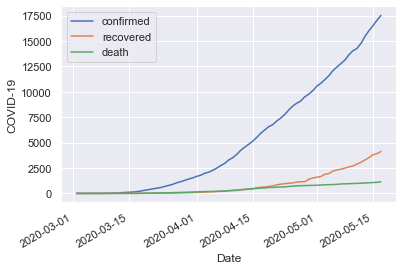

In [25]:
CovIndo.plot()
plt.ylabel('COVID-19');

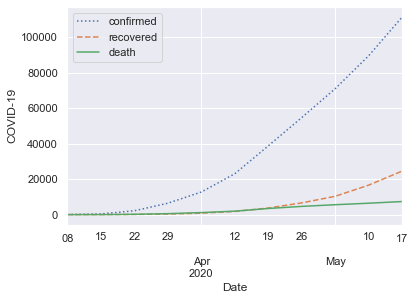

In [27]:
weekly = CovIndo.resample('W').sum() 
weekly.plot(style=[':', '--', '-'])
plt.ylabel('COVID-19');

Cara lain adalah membuat data diambil rata-rata dalam 30 hari dan digambar 

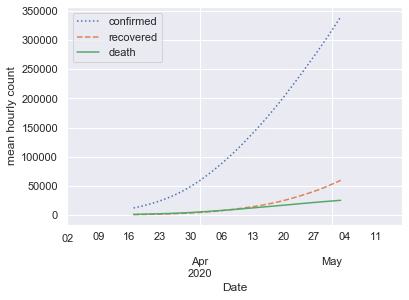

In [28]:
daily =CovIndo.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

Versi yang memperhalus adalah dengan Gaussian dimana lebar kedua jendela 
untuk 50 hari dan lebar untuk Gaussian 10 hari . Data terlibat sama karena berpola eksponensial.
Untuk data yang fluktuatif akan terlihat bedanya, 
    

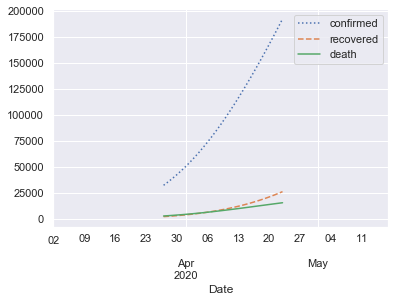

In [29]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [33]:
#Kita akan menggambar data berdasarkan hari-hari dengan melakukan grouping tiap minggu 

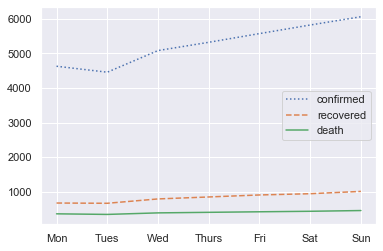

In [32]:
by_weekday = CovIndo.groupby(CovIndo.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);